ナイーブベイズ
---
とりあえずirisデータセットでやってみる。

In [1]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
iris = load_iris()

In [2]:
X, y = iris.data[:, 0:2], iris.target

データまるごと使って分類

In [16]:
nb = GaussianNB()
nb.fit(X, y)
print(nb.predict(X)==y)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  True False  True False  True False  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True False  True
  True  True  True False  True False False  True  True  True  True False
  True False  True False  True  True False False False  True  True  True
 False False False  True  True  True False  True  True  True False  True
  True  True False  True  True False]


データを分割して評価
(元ネタ: http://tinystruggles.com/2014/03/24/classification-with-scikit-learn.html )

In [53]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
iris = load_iris()
X, y = iris.data[:, 0:2], iris.target

データをtrainとtestに分割

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [56]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

0.2刻みのxx, yyごとに予測して，その結果で塗り潰し

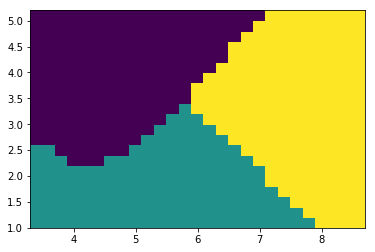

In [57]:
%matplotlib inline
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z)

色をcmapで指定して，更に学習データをプロット

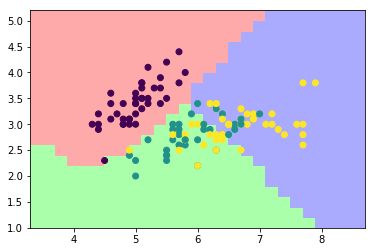

In [58]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

今度は予測してみて結果を重ね書き

Classification score: 0.9


(1.0, 5.1999999999999993)

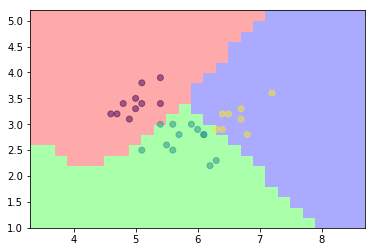

In [60]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
y_predicted = nb.predict(X_test)
print( 'Classification score: ' + str(nb.score(X_test, y_test)))
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_predicted, alpha = 0.5, label = groups)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


凡例を表示したい場合はクラスをuniqueにしてforで回す

Classification score: 0.9


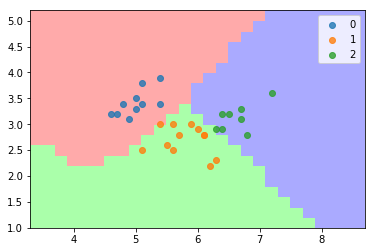

In [62]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
y_predicted = nb.predict(X_test)
print( 'Classification score: ' + str(nb.score(X_test, y_test)))
for cl in np.unique(y_predicted):
    plt.scatter(x = X_test[y_predicted == cl, 0], y = X_test[y_predicted == cl, 1], alpha=0.8, label = cl)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

凡例に文字を使いたい場合はTupleでクラス名を並べてforの時にenumerateして選択させる

Classification score: 0.9


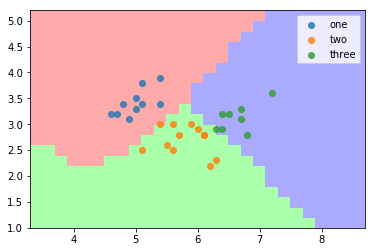

In [63]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
y_predicted = nb.predict(X_test)
groups = ('one', 'two', 'three')
print( 'Classification score: ' + str(nb.score(X_test, y_test)))
for idx, cl in enumerate(np.unique(y_predicted)):
    plt.scatter(x = X_test[y_predicted == cl, 0], y = X_test[y_predicted == cl, 1], alpha=0.8, label = groups[idx])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()